# Canonical ICA on rs-fMRI

This notebook contains exploratory analysis of rs=fMRI using Canonical ICA to find the different networks of the brain and achieve Default Mode Network (DMN) by tweaking the number of components for hte Canonical ICA algorithm

## Necessary Imports

In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from nilearn import plotting, image
from nilearn.decomposition import CanICA
from nilearn.input_data import NiftiMasker
from sklearn.decomposition import FastICA

c:\program files\python37\lib\site-packages\nilearn\datasets\__init__.py:89: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


Define image path to the rs-fMRI image

In [2]:
img_path = "ML Neuroscience Task - Helper Data/Preprocessed rs-fMRI scan/Filtered_4DVolume.nii"

Calculate mean of the image for having it as background during visualization

In [3]:
mean_img = image.mean_img(img_path)

Apply template matching filter for getting the mask of the brain

In [4]:
masker = NiftiMasker(smoothing_fwhm=5.0, memory='cache', memory_level=2, mask_strategy='template', standardize=False, standardize_confounds=False, high_variance_confounds=False)#, low_pass=0.05, high_pass=0.001, t_r=0.2)

data_masked = masker.fit_transform(img_path)

Instantiate FastICA algorithm from Scikit Learn and use num components as 4

In [5]:
n_components = 4
ica = FastICA(n_components=n_components, random_state=42, max_iter=2000)
components_masked = ica.fit_transform(data_masked.T).T

Normalize ICA component masks

In [6]:
components_masked -= components_masked.mean(axis=0)
components_masked /= components_masked.std(axis=0)

Apply threshold on the componenents masked image

In [7]:
components_masked[np.abs(components_masked) < 1.0] = 0

Get inverse transformed components image

In [8]:
component_img = masker.inverse_transform(components_masked)

Visualize different components of the network

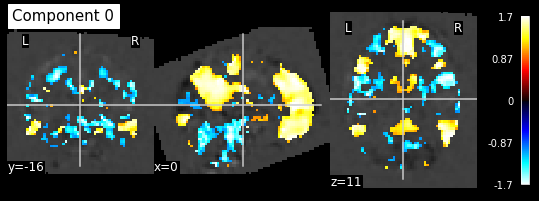

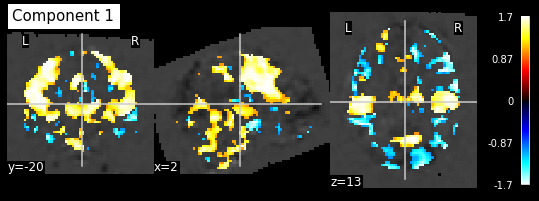

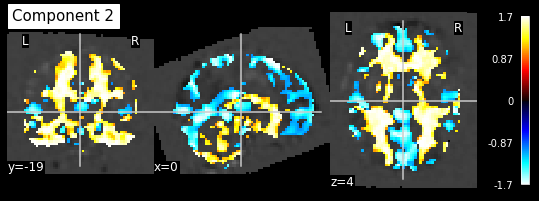

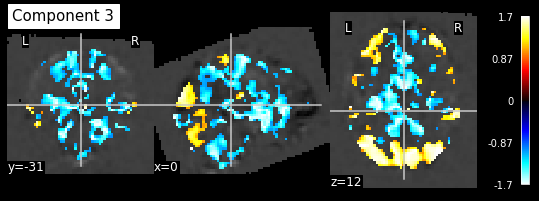

In [9]:
for i in range(n_components):
    plotting.plot_stat_map(image.index_img(component_img, i), mean_img, title=f'Component {i}')
    plotting.show()

Component 0 contains the activations required for the DMN, by tweaking the threshold, high pass values, low pass values, smoothing fwhm, and other parameters we can get the DMN of the given rs-fMRI

## Using NiLearn's CanICA

Apply the same parameters for NiLearn's CanICA

In [10]:
parameters = dict(
                n_components=4, 
                memory_level=2,
                verbose=0,
                mask_strategy="template",
                random_state=42,
            )

Instantiate the CanICA model form NiLearn

In [11]:
ica = CanICA(**parameters)
ica.fit(img_path)

c:\program files\python37\lib\site-packages\nilearn\image\resampling.py:273: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn("Resampling binary images with continuous or "
c:\program files\python37\lib\site-packages\nilearn\decomposition\base.py:227: UserWarning: Caching has been enabled (memory_level = 3) but no Memory object or path has been provided (parameter memory). Caching deactivated for function fast_svd.
  func_memory_level=3)(this_data.T,
c:\program files\python37\lib\site-packages\nilearn\_utils\cache_mixin.py:310: UserWarning: Caching has been enabled (memory_level = 2) but no Memory object or path has been provided (parameter memory). Caching deactivated for function randomized_svd.
  **kwargs)
c:\program files\python37\lib\site-packages\nilearn\_utils\cache_mixin.py:310: UserWarning: Caching has been enabled (memory_level = 2) but 

CanICA(mask_strategy='template', memory_level=2, n_components=4,
       random_state=42)

Get the components as an image

In [12]:
components_img = ica.components_img_

Plot the probability atlas of the ICA components, the signals on atlas looks weak

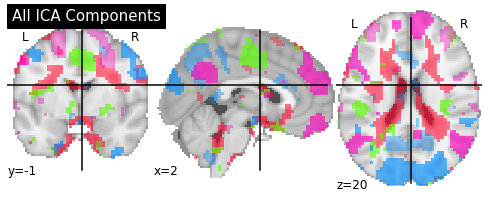

In [13]:
components_img.to_filename("ica_prob_atlas.nii.gz")
plotting.plot_prob_atlas(components_img, title="All ICA Components")

Get variance score of the image using the ICA of 4 components

In [14]:
print(f"Variance Score: {ica.score(imgs=image.load_img(img_path))}")

c:\program files\python37\lib\site-packages\nilearn\_utils\cache_mixin.py:310: UserWarning: Caching has been enabled (memory_level = 2) but no Memory object or path has been provided (parameter memory). Caching deactivated for function explained_variance.
  **kwargs)


Variance Score: 0.14606257015679325


Visualize the components 

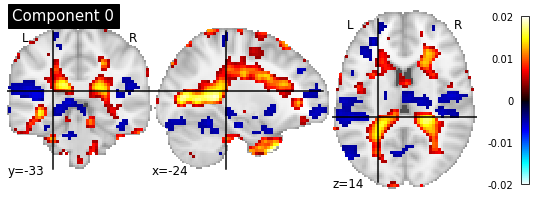

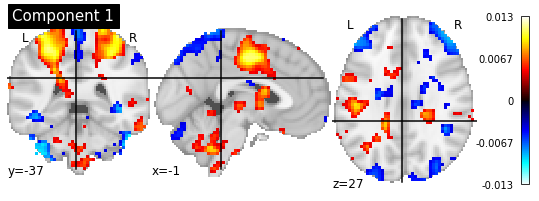

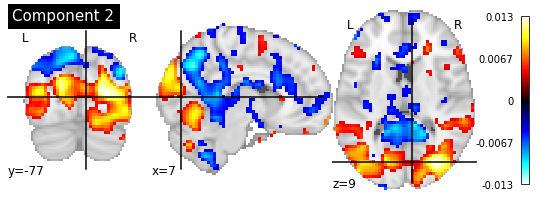

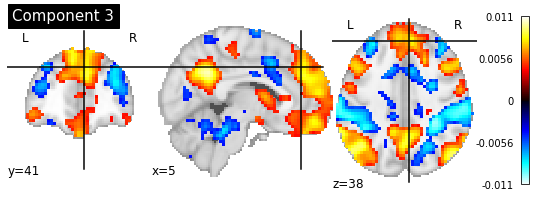

In [15]:
for i in range(parameters['n_components']):
    plotting.plot_stat_map(image.index_img(components_img, i), title=f'Component {i}')

Component 3 contains the activations for the DMN

Experimenting with a different component number

In [16]:
parameters = dict(
                n_components=20, 
                memory_level=2,
                verbose=0,
                mask_strategy="template",
                random_state=0,
            )

Instantiate CanICA and fit the model on the given image

In [17]:
ica = CanICA(**parameters)
ica.fit(img_path)

c:\program files\python37\lib\site-packages\nilearn\image\resampling.py:273: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn("Resampling binary images with continuous or "
c:\program files\python37\lib\site-packages\nilearn\decomposition\base.py:227: UserWarning: Caching has been enabled (memory_level = 3) but no Memory object or path has been provided (parameter memory). Caching deactivated for function fast_svd.
  func_memory_level=3)(this_data.T,
c:\program files\python37\lib\site-packages\nilearn\_utils\cache_mixin.py:310: UserWarning: Caching has been enabled (memory_level = 2) but no Memory object or path has been provided (parameter memory). Caching deactivated for function randomized_svd.
  **kwargs)
c:\program files\python37\lib\site-packages\nilearn\_utils\cache_mixin.py:310: UserWarning: Caching has been enabled (memory_level = 2) but 

CanICA(mask_strategy='template', memory_level=2, random_state=0)

Get components as an image

In [18]:
components_img = ica.components_img_

Plot and save the probability atlas of the components image. The probability map looks strong for 20 components

c:\program files\python37\lib\site-packages\nilearn\plotting\displays.py:103: UserWarning: linewidths is ignored by contourf
  **kwargs)
c:\program files\python37\lib\site-packages\nilearn\plotting\displays.py:103: UserWarning: No contour levels were found within the data range.
  **kwargs)


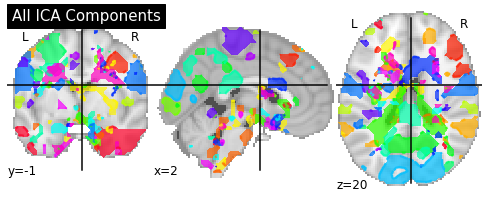

In [19]:
components_img.to_filename("ica_prob_atlas.nii.gz")
plotting.plot_prob_atlas(components_img, title="All ICA Components")

Get variance score

In [20]:
print(f"Variance Score: {ica.score(imgs=image.load_img(img_path))}")

c:\program files\python37\lib\site-packages\nilearn\_utils\cache_mixin.py:310: UserWarning: Caching has been enabled (memory_level = 2) but no Memory object or path has been provided (parameter memory). Caching deactivated for function explained_variance.
  **kwargs)


Variance Score: 0.13739781339780066


Visualize the components

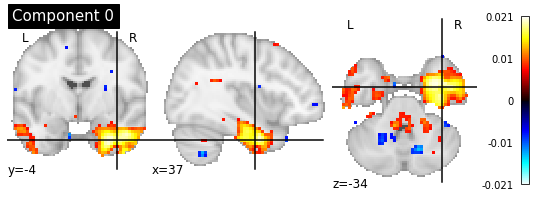

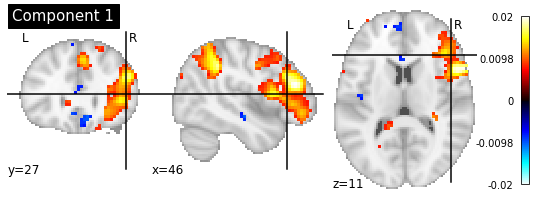

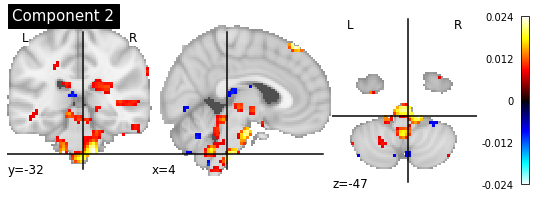

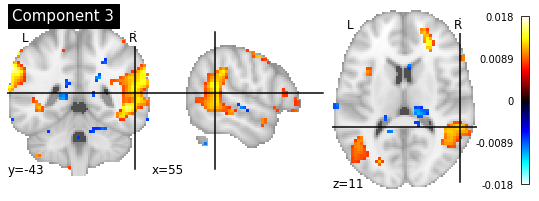

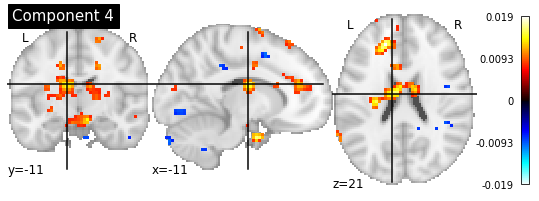

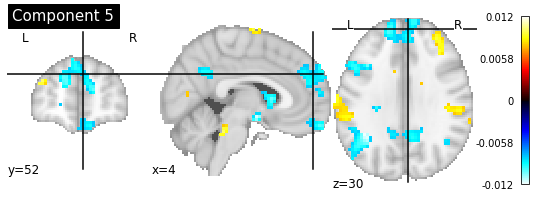

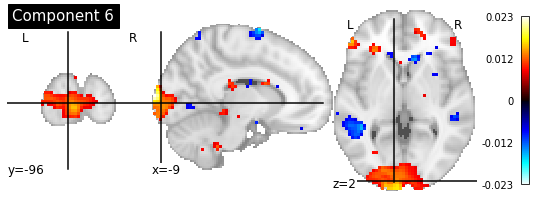

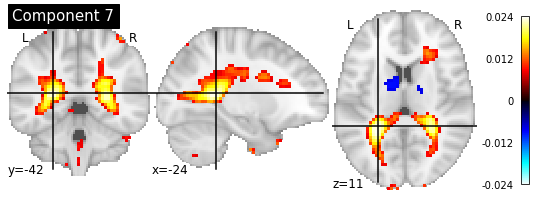

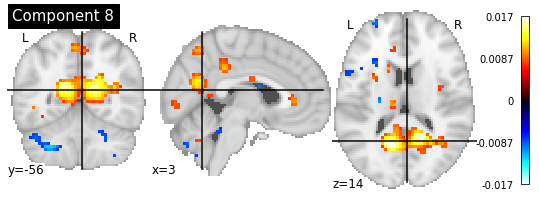

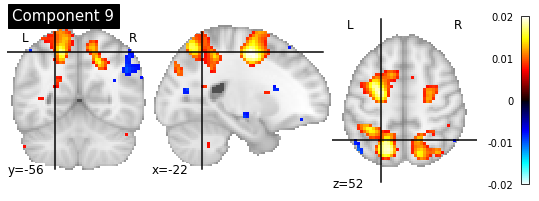

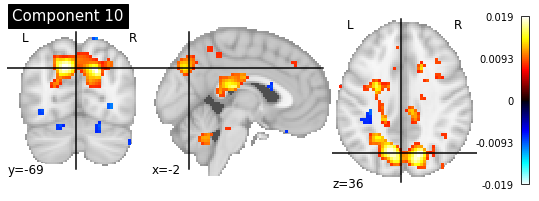

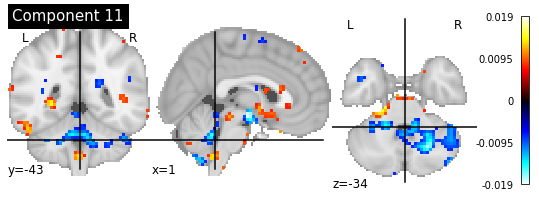

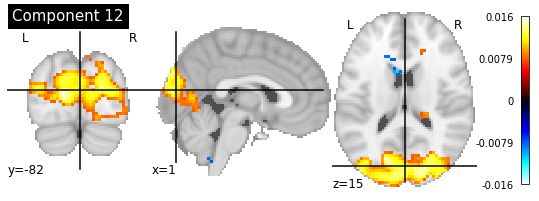

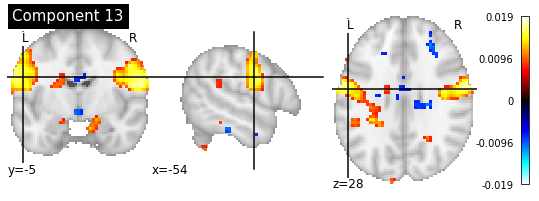

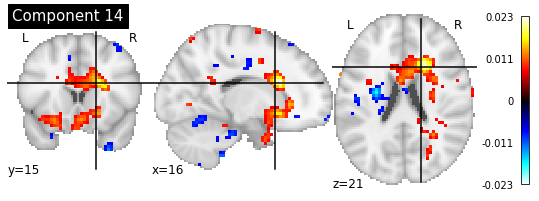

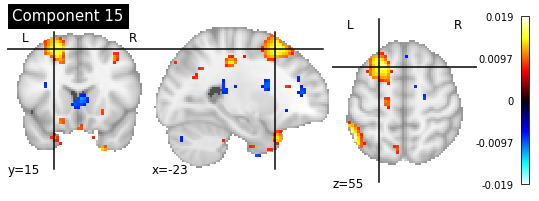

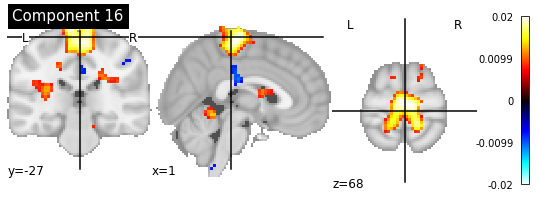

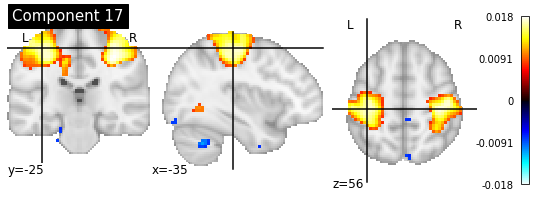

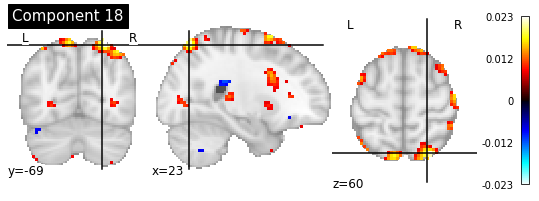

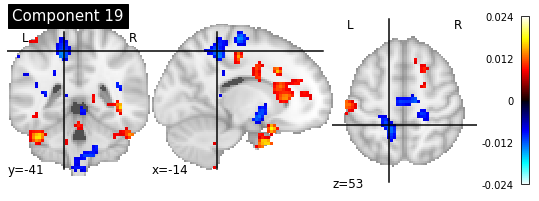

In [21]:
for i in range(parameters['n_components']):
    plotting.plot_stat_map(image.index_img(components_img, i), title=f'Component {i}')